In [1]:
from sklearn.preprocessing import StandardScaler # StandardScaler is used to resize the distribution of values,
# so that the mean of the observed values is 0 and the standard deviation is 1

import matplotlib.pyplot as plt # Matplotlib is a cross-platform, data visualization and graphical plotting library

import numpy as np # NumPy is a Python library used for working with arrays & linear algebra

import os # The OS module in Python provides functions for creating and removing a directory (folder),
# fetching its contents, changing and identifying the current directory, etc.

import pandas as pd # data processing, in this project used for CSV file I/O (e.g. pd.read_csv)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print(os.listdir('/content/drive/MyDrive/AIML/Project_Files/Capstone/car_data'))
# listdir() method in python is used to get the list of all files and directories in the specified directory

['train', 'test']


In [7]:
# User-defined function for "Correlation matrix"

def plotCorrelationMatrix(df, graphWidth): # 'df'-dataframe; 'graphwidth'-width (units = inches) are the inputs to this function
    
    filename = df.dataframeName # the dataframe 'df' name is assigned to 'filename' variable
    
    df = df.dropna('columns') # drop columns with 'NaN'
    
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    if df.shape[1] < 2: # checking if the dataframe has only one column, in such case no correlation can takes place
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr() # corr() is used to find the pairwise correlation of all columns in the dataframe
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    # Create a new figure, or activate an existing figure
    # num = A unique identifier for the figure. 'None' = a new figure is created
    # figsize = Width, height in inches. Can be (float, float)
    # dpi = The resolution of the figure in dots-per-inch.
    # facecolor = The background color.
    # edgecolor = The border color.
    
    corrMat = plt.matshow(corr, fignum = 1)
    # matshow = Display an array as a matrix in a new figure window.
    # The origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally.
    # corr = The matrix to be displayed.
    # fignum = If None, create a new figure window with automatic numbering.
    # fignum = If a nonzero integer, draw into the figure with the given number (create it if it does not exist).
    # fignum = If 0, use the current axes (or create one if it does not exist).
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    # xticks = Get or set the current tick locations and labels of the x-axis
    # range(len()) = to access each item by index in columns of corr
    # corr.columns = The list of xlabel Text objects
    # rotation = rotating xlabels
    
    plt.yticks(range(len(corr.columns)), corr.columns)
    # similar to above 'xticks', but with 'y'
    
    plt.gca().xaxis.tick_bottom()
    # 
    
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Let's check 1st file: ../input/anno_test.csv

In [10]:
nRowsRead = None
# anno_test.csv has 8041 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/AIML/Project_Files/Capstone/anno_test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'anno_test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8040 rows and 6 columns


In [11]:
df1.head(5)

00001.jpg   30   52  246  147  181
0  00002.jpg  100   19  576  203  103
1  00003.jpg   51  105  968  659  145
2  00004.jpg   67   84  581  407  187
3  00005.jpg  140  151  593  339  185
4  00006.jpg   20   77  420  301   78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


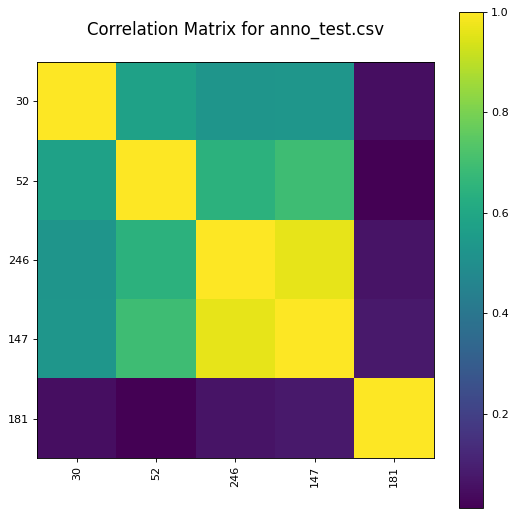

In [13]:
plotCorrelationMatrix(df1, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


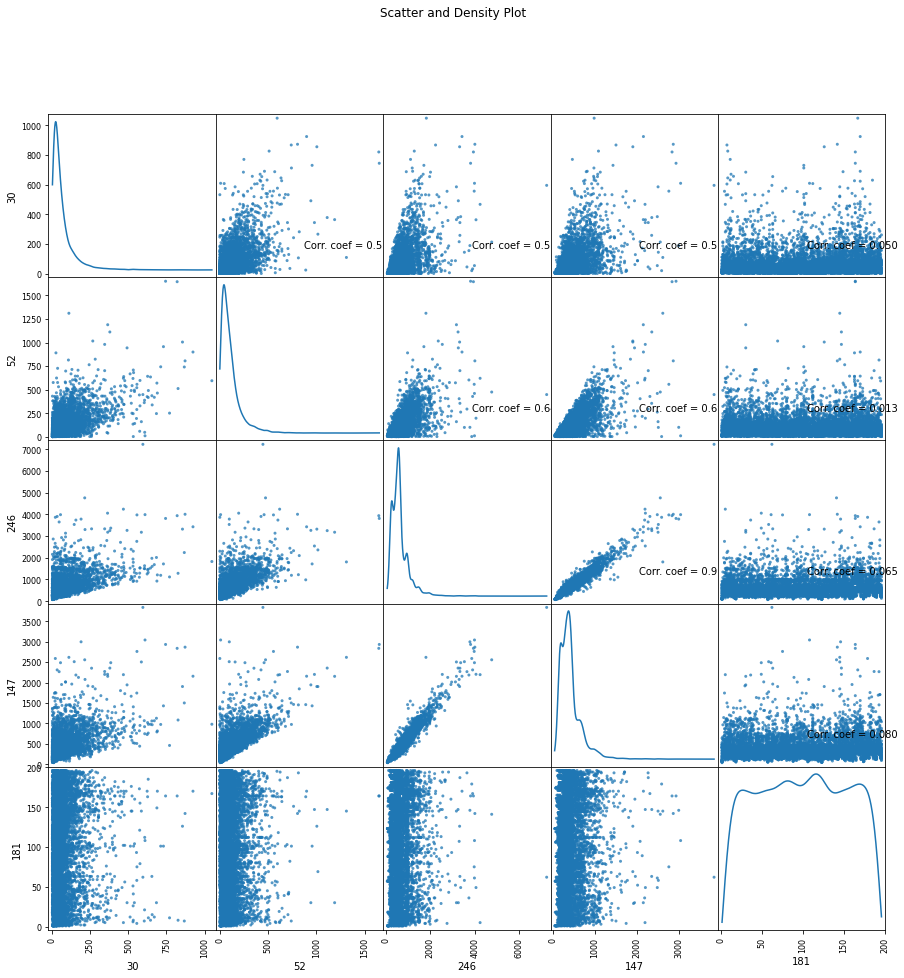

In [14]:
plotScatterMatrix(df1, 15, 10)

Let's check 2nd file: ../input/anno_train.csv

In [16]:
nRowsRead = None
# anno_train.csv has 8144 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/drive/MyDrive/AIML/Project_Files/Capstone/anno_train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'anno_train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8143 rows and 6 columns


In [17]:
df2.head(5)

00001.jpg   39  116   569   375   14
0  00002.jpg   36  116   868   587    3
1  00003.jpg   85  109   601   381   91
2  00004.jpg  621  393  1484  1096  134
3  00005.jpg   14   36   133    99  106
4  00006.jpg  259  289   515   416  123

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


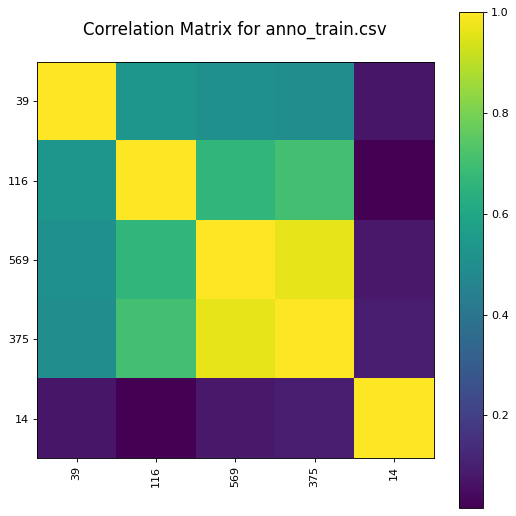

In [18]:
plotCorrelationMatrix(df2, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


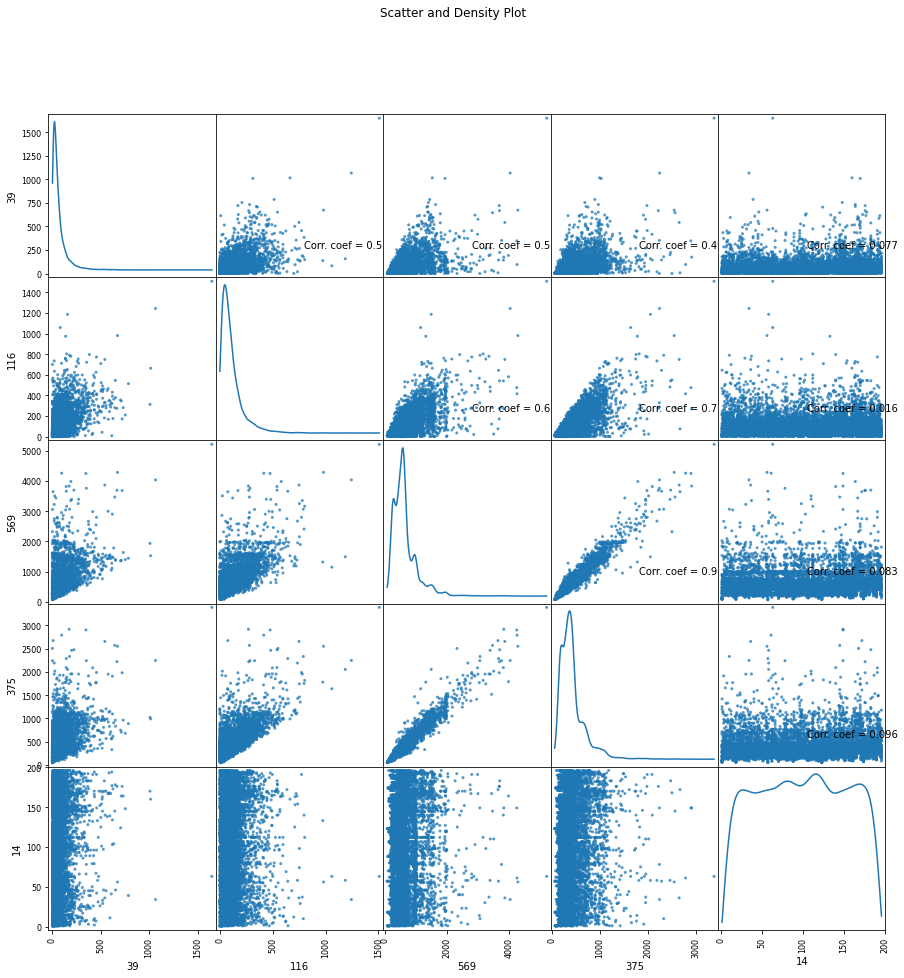

In [19]:
plotScatterMatrix(df2, 15, 10)

Let's check 3rd file: ../input/names.csv

In [20]:
nRowsRead = None
df3 = pd.read_csv('/content/drive/MyDrive/AIML/Project_Files/Capstone/names.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'names.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 195 rows and 1 columns


In [21]:
df3.head(5)

AM General Hummer SUV 2000
0        Acura RL Sedan 2012
1        Acura TL Sedan 2012
2       Acura TL Type-S 2008
3       Acura TSX Sedan 2012
4  Acura Integra Type R 2001

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import time
import os
import PIL.Image as Image
from IPython.display import display

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda:0
Tesla T4


In [23]:
dataset_dir = "/content/drive/MyDrive/AIML/Project_Files/Capstone/car_data/"

train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.ImageFolder(root=dataset_dir+"train", transform = train_tfms)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle=True, num_workers = 2)

dataset2 = torchvision.datasets.ImageFolder(root=dataset_dir+"test", transform = test_tfms)
testloader = torch.utils.data.DataLoader(dataset2, batch_size = 32, shuffle=False, num_workers = 2)

In [24]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):
    
    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(trainloader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            #inputs = inputs.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100/32*running_correct/len(trainloader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)
        
        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies

In [25]:
def eval_model(model):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

In [26]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features


model_ft.fc = nn.Linear(num_ftrs, 196)
model_ft = model_ft.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [27]:
model_ft, training_losses, training_accs, test_accs = train_model(model_ft, criterion, optimizer, lrscheduler, n_epochs=10)

Epoch 1, duration: 995 s, loss: 3.9668, acc: 16.9485
Accuracy of the network on the test images: 34 %
Epoch 2, duration: 151 s, loss: 1.6283, acc: 57.6348
Accuracy of the network on the test images: 57 %
Epoch 3, duration: 154 s, loss: 0.8562, acc: 76.7770
Accuracy of the network on the test images: 66 %
Epoch 4, duration: 154 s, loss: 0.5250, acc: 85.2206
Accuracy of the network on the test images: 74 %
Epoch 5, duration: 152 s, loss: 0.3487, acc: 90.1593
Accuracy of the network on the test images: 80 %
Epoch 6, duration: 154 s, loss: 0.2317, acc: 93.5172
Accuracy of the network on the test images: 82 %
Epoch 7, duration: 155 s, loss: 0.1709, acc: 95.6250
Accuracy of the network on the test images: 82 %
Epoch 8, duration: 153 s, loss: 0.0799, acc: 98.1618
Accuracy of the network on the test images: 89 %
Epoch 9, duration: 154 s, loss: 0.0548, acc: 98.7868
Accuracy of the network on the test images: 90 %
Epoch 10, duration: 154 s, loss: 0.0476, acc: 99.0196
Accuracy of the network on t

Text(0.5, 1.0, 'Test acc')

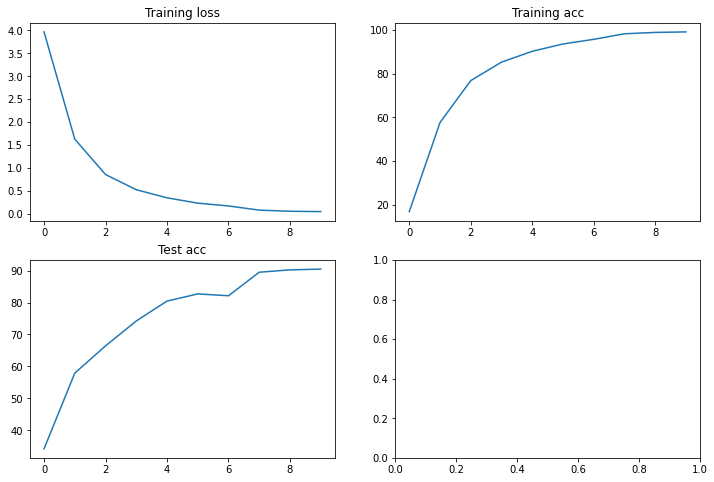

In [28]:
# plot the stats

f, axarr = plt.subplots(2,2, figsize = (12, 8))
axarr[0, 0].plot(training_losses)
axarr[0, 0].set_title("Training loss")
axarr[0, 1].plot(training_accs)
axarr[0, 1].set_title("Training acc")
axarr[1, 0].plot(test_accs)

axarr[1, 0].set_title("Test acc")

In [29]:
# tie the class indices to their names

def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(dataset_dir+"train")

In [30]:
# test the model on random images
dataset_dir = "/content/drive/MyDrive/AIML/Project_Files/Capstone/car_data/"
torch.save(model_ft,"/content/drive/MyDrive/AIML/Project_Files/Capstone/car_data/working/model.h5")

# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model_ft.eval()

# transforms for the input image
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
image = Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg")
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
image = image.unsqueeze(0)
image = image.cuda()

output = model_ft(image)
conf, predicted = torch.max(output.data, 1)

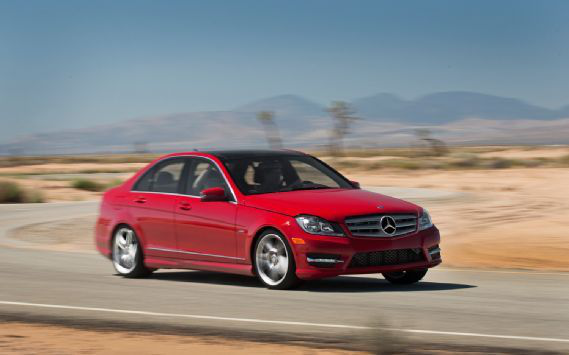

Mercedes-Benz C-Class Sedan 2012 confidence:  15.01318073272705


In [31]:
# get the class name of the prediction
display(Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg"))
print(classes[predicted.item()], "confidence: ", conf.item())

In [32]:
dataset_dir = "/content/drive/MyDrive/AIML/Project_Files/Capstone/car_data/test"

In [33]:
import os
listFolders = os.listdir(dataset_dir)

In [34]:
import glob

classNames = []
filePaths=[]
for folder in listFolders:
    i=0
    for file in glob.glob(dataset_dir+"/"+folder+"/*.jpg"):
        if(i==5):
            break
        classNames.append(folder)
        filePaths.append(file)
        i=i+1

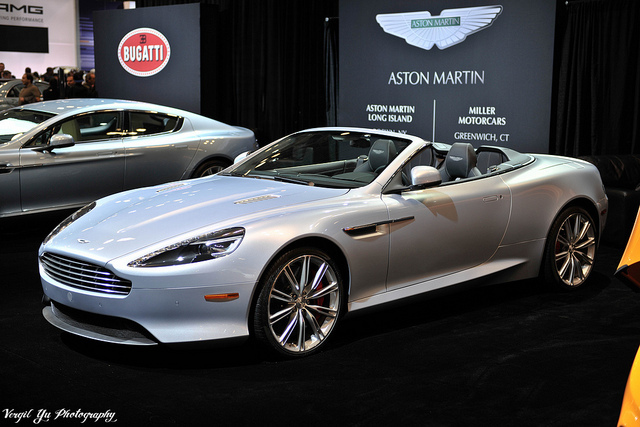

Aston Martin Virage Convertible 2012 confidence:  15.837179183959961


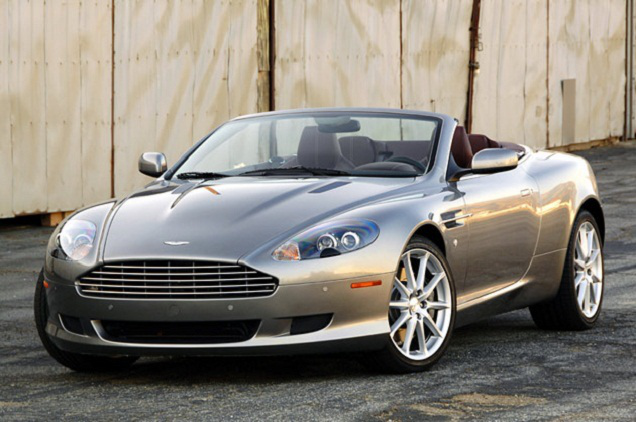

Aston Martin V8 Vantage Convertible 2012 confidence:  10.637139320373535


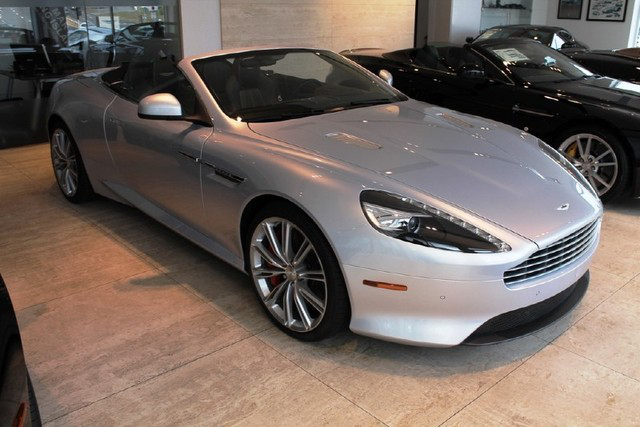

Aston Martin Virage Convertible 2012 confidence:  18.681026458740234


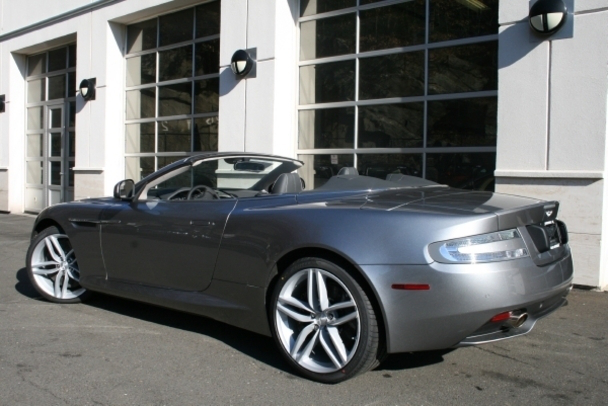

Aston Martin Virage Convertible 2012 confidence:  16.215911865234375


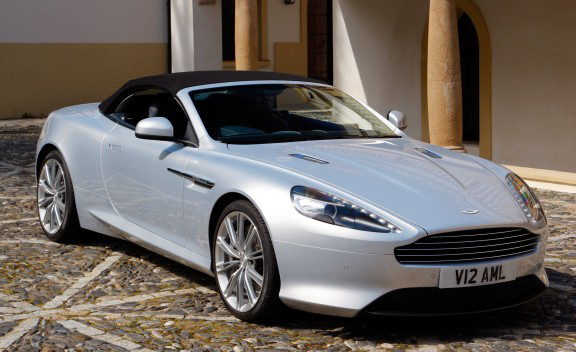

Aston Martin Virage Convertible 2012 confidence:  16.623130798339844


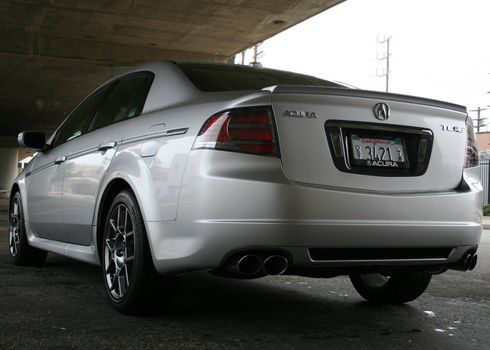

Acura TL Type-S 2008 confidence:  12.212014198303223


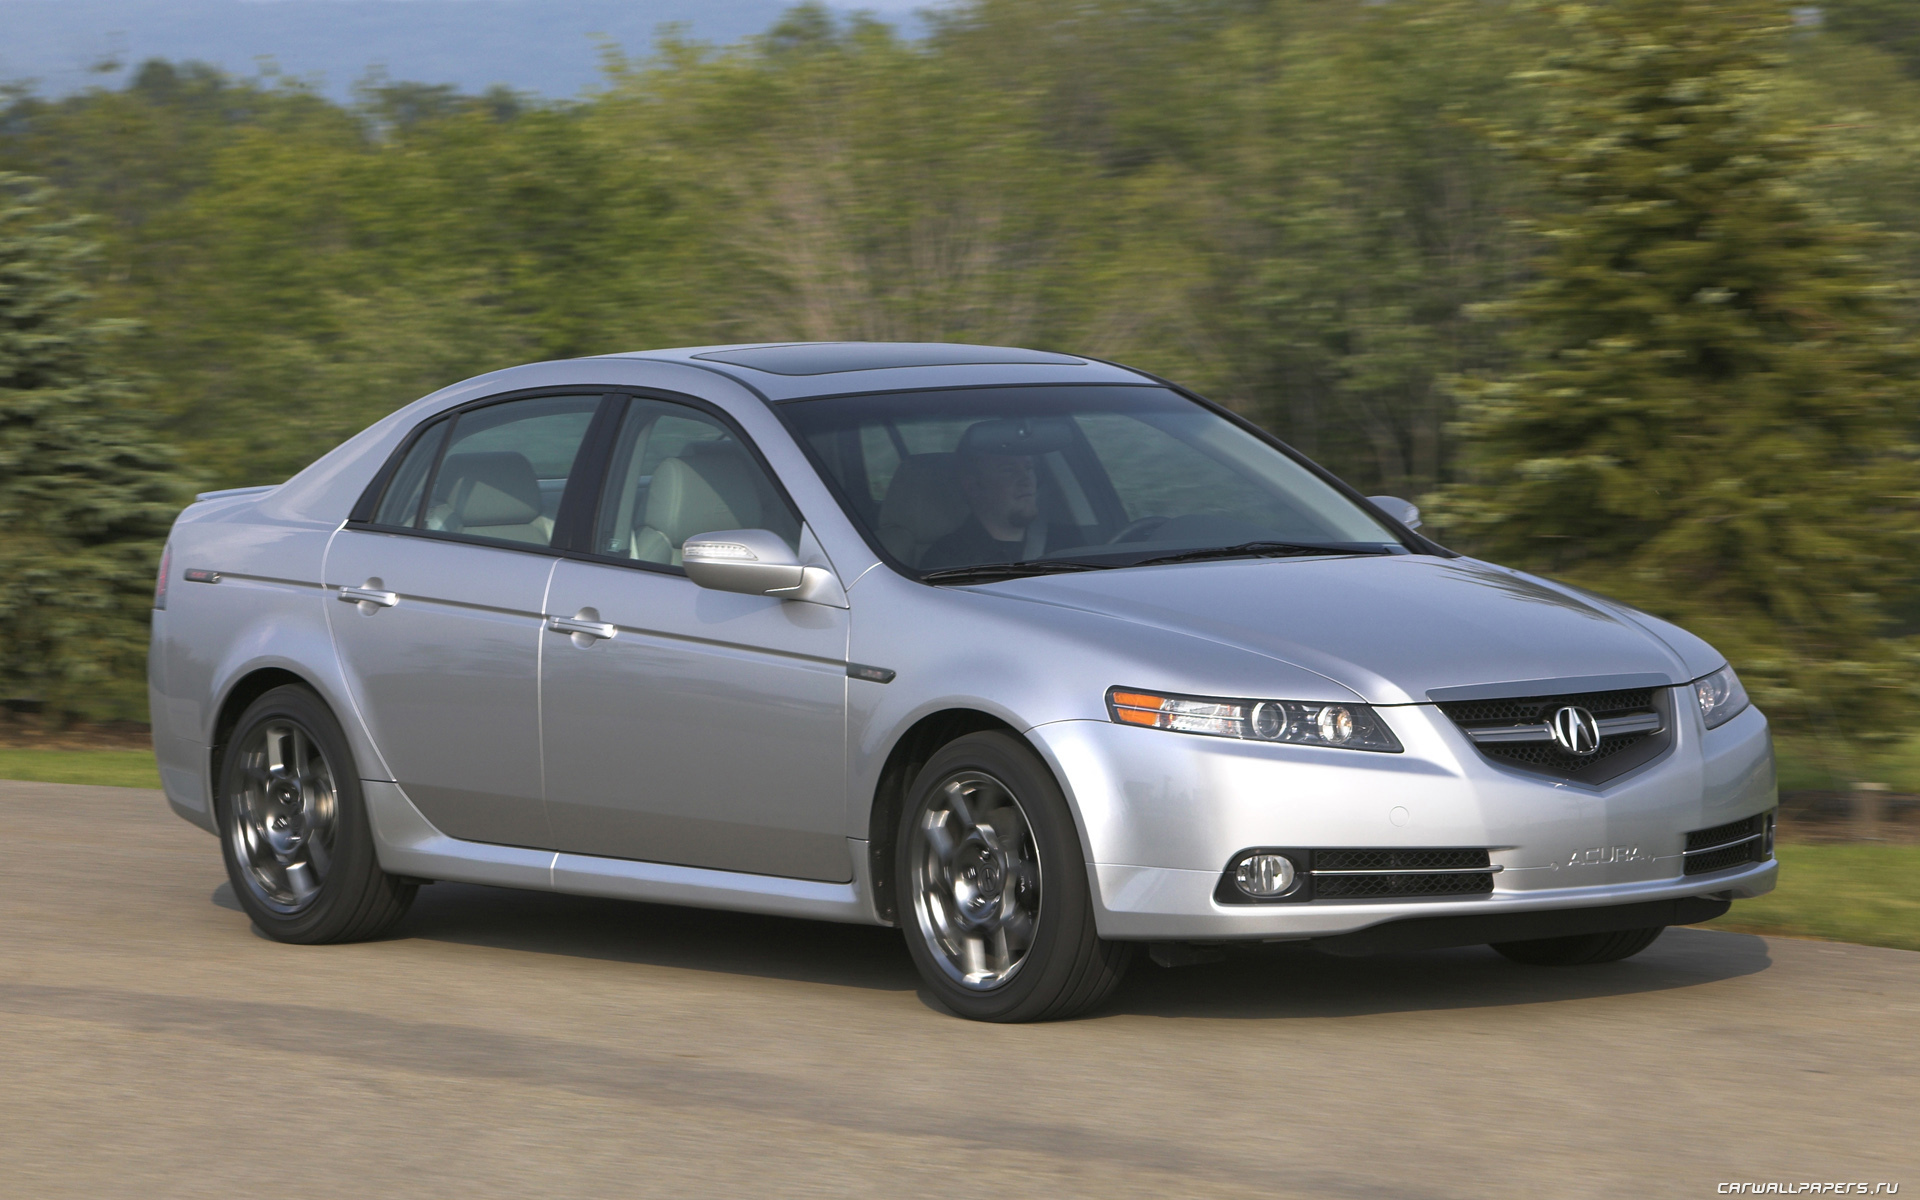

Acura TL Type-S 2008 confidence:  17.66625213623047


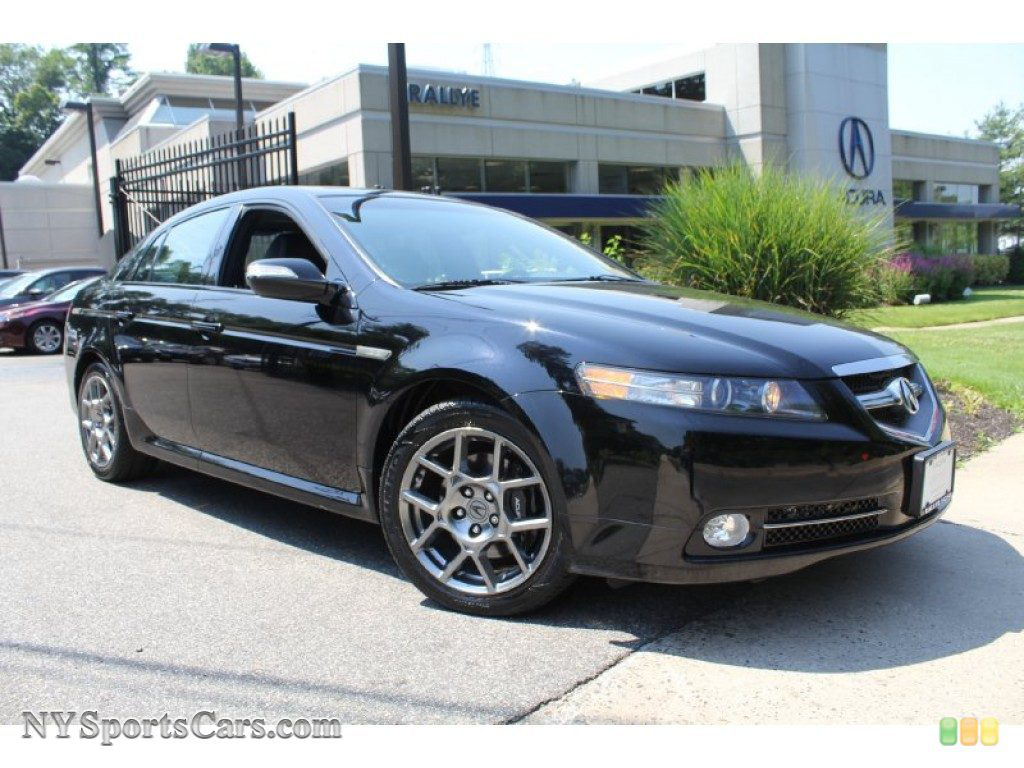

Acura TL Type-S 2008 confidence:  18.62812614440918


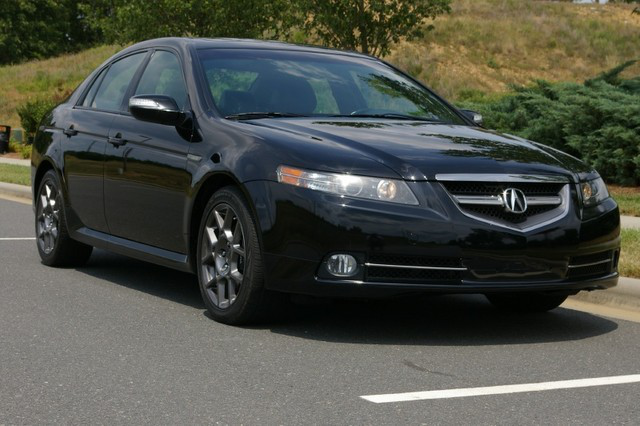

Acura TL Type-S 2008 confidence:  18.368614196777344


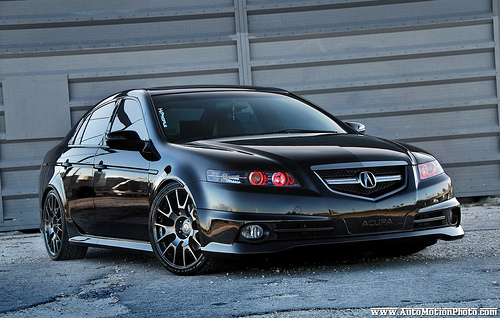

Mercedes-Benz SL-Class Coupe 2009 confidence:  10.162840843200684


In [35]:
count = 0
for imgPath in filePaths:
# transforms for the input image
    try:
        loader = transforms.Compose([transforms.Resize((400, 400)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        image = Image.open(imgPath)
        if(image is None):
            continue
        image = loader(image).float()
        image = torch.autograd.Variable(image, requires_grad=True)
        image = image.unsqueeze(0)
        image = image.cuda()
        output = model_ft(image)
        conf, predicted = torch.max(output.data, 1)
        display(Image.open(imgPath))
        print(classes[predicted.item()], "confidence: ", conf.item())
        count += 1
        if count >= 10:
            break
    except:
        print("Error")